## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [60]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
from sklearn.datasets import make_classification
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# load data
wine=datasets.load_wine()
#print(wine.DESCR)
# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = pd.DataFrame((df_wine[selected_features].values), columns = (selected_features))
y = wine.target
X_val = np.array(X)
# print the dataset to understand it better
df_wine


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

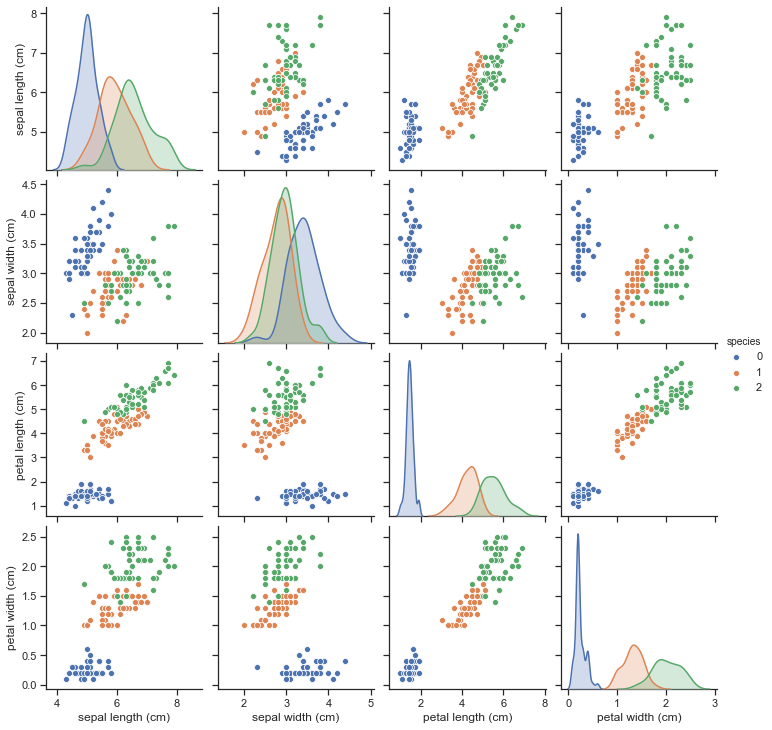

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [61]:
# define plotting function

# we import the libraries we could need
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import numpy as np

#plotting function
def myplotGrid(X,y):
    
    # we use seaborn to plot the selected features of the dataset to understand how they interact with each other 
    # we use color intensity for the hue
      

    X['target']=y
    
    sns.pairplot(X, hue = "target" , markers=['o','s','d'])
    del X['target']
    return 
       

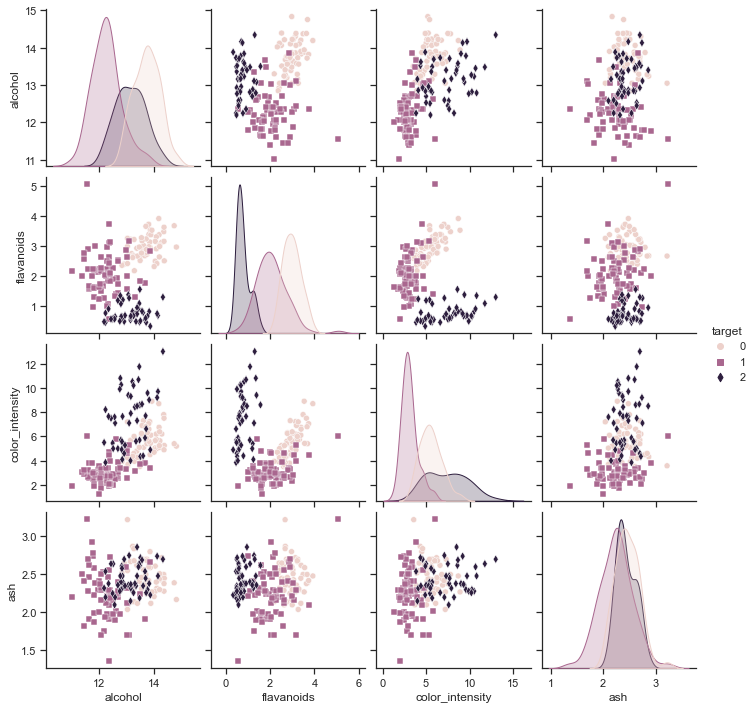

In [62]:
# here we run the plotting function

myplotGrid(X,y)


### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

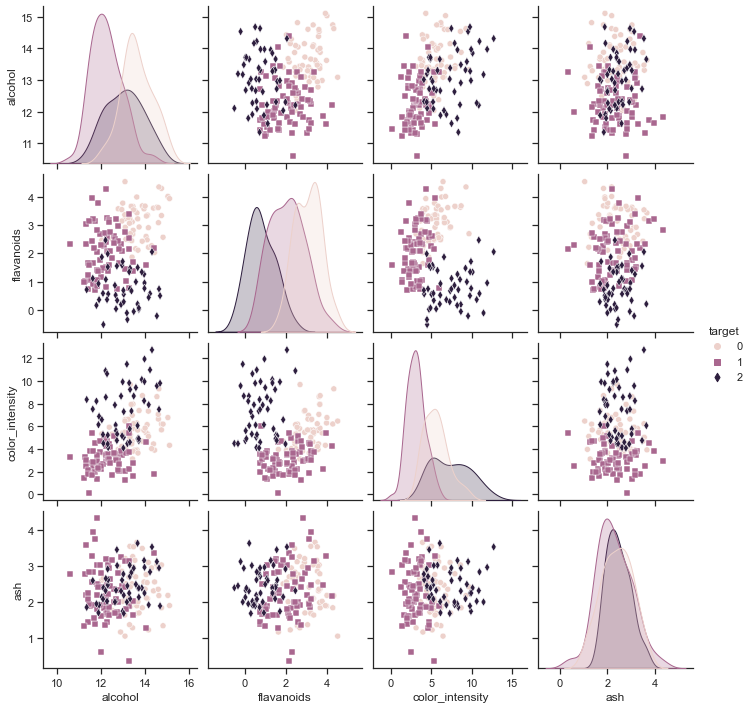

In [63]:
# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)
XN_Val = np.array(XN)

myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


In [64]:
# we use describe to get some statistical data for each feature
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Answer: 

Feature selection is not a simple choice especially when we have many features in a dataset.
We choose using different techniques and adapting our strategies to the circumstances.
Domain expertise play an important role together with experimentation and experience.
Visual exploration of the data can also provide valuable infomation in the decision process.
The features for example that in the scatterplot appears with less overlapping with other features are the most significant. 
Higher overlapping means that features distributions are close to each other.
In the case above probably the best features are 1 and 2.


    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


Answer:

Data in real life contain some noise and adding it make it more challenging. Adding some noise seems to increase the spread and variability and reduce the accuracy.



## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [65]:
# create a class containing the full implementation 

# helper code for X
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_val, y, test_size=0.2)
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_test)
print(y_pred) 


print("For clean data: \n", confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



#helper code for XN
XN_train, XN_test, yN_train, yN_test = train_test_split(XN_Val, y, test_size=0.2)
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(XN_train,yN_train)
yN_pred=knn.predict(XN_test)
print(yN_test)
print(yN_pred) 

print("For noisy data: \n", confusion_matrix(yN_test,yN_pred))
print(accuracy_score(yN_test,yN_pred))


#Split the data into a train and test set for clean data

import random

#Clean the data
def CleanX(X):
    data=X.values
    return data[:,1:]

#Split Data 
def Split(X,Y):
    print(Y)
    shuffler = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffler]
    Y_shuffled = Y[shuffler]
    print(Y_shuffled)
    split = int(0.8*X.shape[0])

    X_train = X_shuffled[:split,:]
    Y_train = Y_shuffled[:split]

    X_test = X_shuffled[split:,:]
    Y_test = Y_shuffled[split:]
    return X_train,Y_train,X_test,Y_test



#define 2 distance functions to test in cross validation
def euclidian_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def manhattan_dist(x1,x2):
    return np.abs(sum(x1-x2))


#define neighbors function 

def kNN(X,Y,queryPoint,k,dist):
    #create empty list to store distance values
    vals = []
    m = X.shape[0]
    d=0
    
    #iterate through to find which distance to use
    for i in range(m):
        if dist == 0:
            d = euclidian_dist(queryPoint,X[i])
        elif dist==1:
            d = manhattan_dist(queryPoint,X[i])
        
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    
    # Nearest/First K points
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred


#assign prediction labels to test sample

def knn_pred(X,Y,X_,k,d):
    y_pred=[]
    for x in X_:
        y_pred.append(kNN(X,Y,x,k,d))
    return y_pred


def myknn(X_df,Y,k,d):
    X = CleanX(X_df)
    X,Y,X_,Y_=Split(X,Y)
    return knn_pred(X,Y,X_,k,d),Y_


ypred,ytest=myknn(X,y,5,0)
ypredN,ytestN=myknn(XN,y,5,0)
print(accuracy_score(ytest,ypred))
print(accuracy_score(ytestN,ypredN))



[2 2 0 0 1 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 1 2 1 0 0 2 2 1]
[1 2 0 0 0 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 1 1]
For clean data: 
 [[10  0  0]
 [ 2  9  0]
 [ 0  2 13]]
0.8888888888888888
[0 2 1 1 2 1 2 2 2 1 1 1 1 0 2 1 0 0 2 1 2 0 1 1 1 2 1 1 2 2 2 1 1 1 1 0]
[0 2 1 1 2 1 2 2 2 1 1 1 0 0 2 1 0 0 2 1 2 0 0 1 0 1 1 1 2 2 2 1 1 1 1 0]
For noisy data: 
 [[ 6  0  0]
 [ 3 15  0]
 [ 0  1 11]]
0.8888888888888888
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 2 2 0 0 2 0 0 2 2 0 0 1 2 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 2 1 2 0 1 1 1 0
 1 1 1 0 2 0 1 0 1 1 1 2 2 2 2 1 2 1 0 2 1 2 1 0 2 0 2 1 0 2 1 0 2 1 2 1 2
 2 1 0 1 0 2 2 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0

## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [78]:
# confusion matrix, accuracy, precision, recall, etc. 


#Accuracy Score
def accuracy(ytest,ypred):
    accscore = (sum(abs(ytest-ypred))/len(ypred))
    
    return 1 - accscore

print("The Accuracy score for the clean data is: \n", accuracy(ytest,ypred)*100, "%")
print("The Accuracy score for the Noisy data is: \n", accuracy(ytestN,ypredN)*100, "%")



#Confusion Matrix
def myconfmat(ytest,ypred):
    cm = np.zeros((3,3), dtype=np.int)
    for i in range(0,len(ypred)):
        cm[ytest[i],ypred[i]]+=1
    return cm

print("The confusion matrix for the clean data is : \n", myconfmat(y_test,y_pred) )
print("The confusion matrix for the noisy data is : \n", myconfmat(yN_test,yN_pred))

#Precision function

def myPrecision(y_test,y_pred):
    classes = np.unique(y_test)
    precision = np.zeros(classes.shape)

    C = myconfmat(y_test,y_pred)
    for i in classes:
        precision[i] = C[i,i] / sum(C[:,i])
    return precision

#Recall function

def myRecall(y_test,y_pred):
    classes = np.unique(y_pred)
    recall = np.zeros(classes.shape)
    C = myconfmat(y_test,y_pred)
    for i in classes:
        recall[i] = C[i,i] / sum(C[i,:])
    return recall

#print the confusion matrix, classes, precision and recall

print('Classes: %s' % np.unique(y_pred))

print('My clean data Precision: %s' % myPrecision(y_test,y_pred))
print('My noisy data Precision: %s' % myPrecision(yN_test,yN_pred))

print('My clean data Recall: %s' % myRecall(y_test,y_pred))
print('My noisy data Recall: %s' % myRecall(yN_test,yN_pred))


The Accuracy score for the clean data is: 
 94.44444444444444 %
The Accuracy score for the Noisy data is: 
 77.77777777777779 %
The confusion matrix for the clean data is : 
 [[10  0  0]
 [ 2  9  0]
 [ 0  2 13]]
The confusion matrix for the noisy data is : 
 [[ 6  0  0]
 [ 3 15  0]
 [ 0  1 11]]
Classes: [0 1 2]
My clean data Precision: [0.83333333 0.81818182 1.        ]
My noisy data Precision: [0.66666667 0.9375     1.        ]
My clean data Recall: [1.         0.81818182 0.86666667]
My noisy data Recall: [1.         0.83333333 0.91666667]



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [79]:
# myNestedCrossVal code

def myNestedCrossVal(X,Y,fold,Klist,distancelist,mySeed):
    #randomly split data into folds
    np.random.seed(mySeed) 
    shuffler = np.random.permutation(X.shape[0])
    X_shuffled = CleanX(X)[shuffler]
    Y_shuffled = Y[shuffler]
    X_folds = np.array_split(X_shuffled,fold)
    Y_folds = np.array_split(Y_shuffled,fold)
    
    #create lists to store the accuracies, k, and distance
    acc=[]
    K=[]
    D=[]
    
    #iterate through the folds
    
    for i in range(fold):
        X_test =  X_folds[i]
        Y_test =  Y_folds[i]
        x = X_folds[:i]+X_folds[i+1:]
        y = Y_folds[:i]+Y_folds[i+1:]
        accuraciesE=[]
        accuraciesM=[]
        
        #iterate through variations of k 
        
        for k in Klist:
            avg_euc = []
            avg_man = []
            for j in range(len(x)):
                X_val =  x[j]
                Y_val =  y[j]
                x_train = np.concatenate(np.array(x[:j]+ x[j+1:]), axis=0)
                y_train = np.concatenate(np.array(y[:j]+ y[j+1:]), axis=0)
                currY_E=knn_pred(x_train,y_train,X_val,k,0)
                Accuracy_E =  accuracy_score(Y_val,currY_E)
                currY_M= knn_pred(x_train,y_train,X_val,k,1)
                Accuracy_M =  accuracy_score(Y_val,currY_M)
                avg_euc.append(Accuracy_E)
                avg_man.append(Accuracy_M)
                
                
            accuraciesE.append(sum(avg_euc)/len(avg_euc))
            accuraciesM.append(sum(avg_man)/len(avg_man))
        d=1
        if max( accuraciesE)> max( accuraciesM):
            d=0
        if d==0:   
            bestK =  accuraciesE.index(max( accuraciesE))+1
        else:
            bestK =  accuraciesM.index(max( accuraciesM))+1
        K.append(bestK)
        if d==0:
            D.append(distancelist[0])
        else :
            D.append(distancelist[1])
        X_train = np.concatenate(np.array(x), axis=0)
        Y_train = np.concatenate(np.array(y), axis=0)       
        currY=knn_pred(X_train,Y_train,X_test,bestK,d)
        Accuracy =  accuracy_score(Y_test,currY)
        acc.append(Accuracy)
    return acc,K ,D 

            

In [80]:
#evaluate clean data code
myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],1)


<ipython-input-79-d012025c409e>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train = np.concatenate(np.array(x[:j]+ x[j+1:]), axis=0)
<ipython-input-79-d012025c409e>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y_train = np.concatenate(np.array(y[:j]+ y[j+1:]), axis=0)
<ipython-input-79-d012025c409e>:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' w

([0.8611111111111112,
  0.9444444444444444,
  0.9444444444444444,
  0.8285714285714286,
  0.9428571428571428],
 [8, 8, 8, 4, 9],
 ['euclidean', 'euclidean', 'euclidean', 'euclidean', 'euclidean'])

In [81]:
# evaluate noisy  data code

myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],1)

<ipython-input-79-d012025c409e>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train = np.concatenate(np.array(x[:j]+ x[j+1:]), axis=0)
<ipython-input-79-d012025c409e>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y_train = np.concatenate(np.array(y[:j]+ y[j+1:]), axis=0)
<ipython-input-79-d012025c409e>:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' w

([0.8333333333333334,
  0.8888888888888888,
  0.8611111111111112,
  0.8,
  0.7714285714285715],
 [10, 7, 6, 6, 4],
 ['euclidean', 'euclidean', 'euclidean', 'euclidean', 'euclidean'])

## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


In [57]:
# Print the summaries

#As per results above and as mentioned by Dr. Ramana i filled up the tables manually.

#CLEAN DATA:
    
# | Fold | accuracy |  k  | distance |
# | 1 | .861  |  8 | euclidean  |
# | 2 | .944 |  8 | euclidean  |
# | 3 | .944  |  8 | euclidean  |
# | 4 | .828  |  4 | euclidean  |
# | 5 | .942  |  9 | euclidean  |
 

#NOISY DATA:

# | Fold | accuracy |  k  | distance |
# | --- | --- | --- | --- |
# | 1 | .888  |  9 | euclidean  |
# | 2 | .888  |  9 | euclidean  |
# | 3 | .861  |  3 | euclidean  |
# | 4 | .857  |  3 | euclidean  |
# | 5 | .885  |  3 | euclidean  |

#Total should be the average over all the folds



### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


CLEAN
The confusion matrix for the clean data is : 
 [[10  0  0]
 [ 2  9  0]
 [ 0  2 13]]
NOISY
The confusion matrix for the noisy data is : 
 [[ 6  0  0]
 [ 3 15  0]
 [ 0  1 11]]
My clean data Precision: [0.83333333 0.81818182 1.        ]
My noisy data Precision: [0.66666667 0.9375     1.        ]
My clean data Recall: [1.         0.81818182 0.86666667]
My noisy data Recall: [1.         0.83333333 0.91666667]


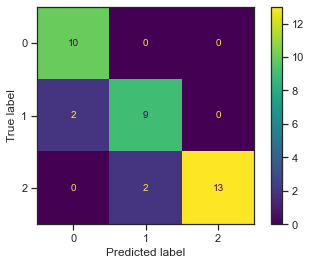

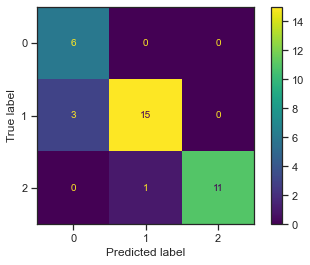

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('CLEAN')
# clean data summary results
print("The confusion matrix for the clean data is : \n", myconfmat(y_test,y_pred))
cmc = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cmc)
disp.plot()

print('NOISY')
# noisy data summary results
print("The confusion matrix for the noisy data is : \n", myconfmat(yN_test,yN_pred))
cmn = confusion_matrix(yN_test,yN_pred)
disp = ConfusionMatrixDisplay(cmn)
disp.plot()

print('My clean data Precision: %s' % myPrecision(y_test,y_pred))
print('My noisy data Precision: %s' % myPrecision(yN_test,yN_pred))
print('My clean data Recall: %s' % myRecall(y_test,y_pred))
print('My noisy data Recall: %s' % myRecall(yN_test,yN_pred))



## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:Noise can reduce the accuracy, but also in same case can help us by adding more data we can train on. 







### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:
we choose the class with the point closest to the query point and we can employ weights to assign bigger values to points closer to point of interest. 

Pseudocode.


Initialize the value of k
To getting the predicted class, iterate from 1 to the total number of training data points
Calculate the Euclidean distance between test data and each row of training data. 
Assign a weightage to features according to importance
Sort the calculated distances in ascending order based on distance values
Get top k rows from the sorted array
Get the most frequent class of these rows
Return the predicted class





### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

Understand which features from the dataset will be selected and how they interact with each other this will require an initial exploratory data analysis that will inform us on the next steps to undertake and how to split the data.

